In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # pyplot is for showing images


In [2]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')#reads the file

In [3]:
data.head()#shows the training examples, each row corresponds to one example

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data)#converting data to numpy array
m,n=data.shape#m are rows and n are columns
np.random.shuffle(data)
#Development set
dev_data=data[0:1000].T#transposing 1000 examples
y_devdata=dev_data[0]#label
x_devdata=dev_data[1:n]#actual data set 

#Training sets, remaining examples after 1000
train_data=data[1000:m].T#transposing the rest of examples
y_train=train_data[0]#labels, the first column
x_train=train_data[1:n]#actual data set
x_train=x_train/255
_,m_train=x_train.shape

In [5]:
#Parameters such as weights and biases
def init_parameters():
    w1=np.random.rand(10, 784) -0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2
    
def ReLU(z):#activation method for 0 to 1st layer
    return np.maximum(0,z)


def softmax(z):#activation method 1st to 2nd
    A = np.exp(z)/sum(np.exp(z))#collapses all rows(examples) into one and summed across all the columns which we divide with to each element which gives us the probability
    return A

#forward propogation
def forward_propogation(w1,b1,w2,b2,x):
    z1=w1.dot(x)+b1
    A1=ReLU(z1)
    z2=w2.dot(A1)+b2
    A2=softmax(z2)
    return z1,A1,z2,A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def derivative_ReLU(z):
    return z>0 #When z > 0: ReLU(z) = z, so derivative = 1

#backwards propogation to find error
def back_propogation(z1,A1,z2,A2,w1,w2,y,x):
    encoded_y=one_hot(y)
    dz2=A2-encoded_y
    dw2=1/m*dz2.dot(A1.T)
    db2=1/m*np.sum(dz2)
    dz1=w2.T.dot(dz2)*derivative_ReLU(z1)
    dw1=1/m*dz1.dot(x.T)
    db1=1/m*np.sum(dz1)
    return dw1, db1, dw2, db2


#updates parameters
def updata_param(w1,b1,w2,b2,dw2,db2,dw1,db1,alpha):
    w1=w1-dw1*alpha #alpha is the learning rate of the training
    b1=b1-db1*alpha
    w2=w2-dw2*alpha 
    b2=b2-db2*alpha
    return w1,b1,w2,b2


    





In [6]:
def get_predictions(A2):
    return np.argmax(A2,0)
    

                     
def accuracy(predictions,y):
    print(predictions,y)
    return np.sum(predictions==y)/y.size


def gradient_desc(x, y, iterations, alpha):
    w1, b1, w2, b2 = init_parameters()
    for i in range(iterations):
        z1, A1, z2, A2 = forward_propogation(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_propogation(z1,A1,z2,A2,w1,w2,y,x)
        w1, b1, w2, b2 = updata_param(w1, b1, w2, b2, dw2, db2, dw1, db1, alpha)
        if(i % 10 == 0):
            print("iteration:", i)
            print("Accuracy:", accuracy(get_predictions(A2), y))        
    return w1, b1, w2, b2

In [7]:
w1,b1,w2,b2 =gradient_desc(x_train,y_train,500,0.10)

iteration: 0
[3 3 7 ... 7 3 3] [5 3 1 ... 7 9 5]
Accuracy: 0.1400487804878049
iteration: 10
[6 6 7 ... 7 3 5] [5 3 1 ... 7 9 5]
Accuracy: 0.20153658536585367
iteration: 20
[6 6 7 ... 7 3 5] [5 3 1 ... 7 9 5]
Accuracy: 0.2346341463414634
iteration: 30
[6 6 7 ... 7 3 5] [5 3 1 ... 7 9 5]
Accuracy: 0.2805365853658537
iteration: 40
[1 6 7 ... 7 3 5] [5 3 1 ... 7 9 5]
Accuracy: 0.3668780487804878
iteration: 50
[1 6 7 ... 7 0 5] [5 3 1 ... 7 9 5]
Accuracy: 0.4375609756097561
iteration: 60
[1 8 7 ... 7 8 5] [5 3 1 ... 7 9 5]
Accuracy: 0.49304878048780487
iteration: 70
[1 8 7 ... 7 8 5] [5 3 1 ... 7 9 5]
Accuracy: 0.5360487804878049
iteration: 80
[1 8 8 ... 7 8 5] [5 3 1 ... 7 9 5]
Accuracy: 0.5725121951219512
iteration: 90
[1 8 8 ... 7 9 5] [5 3 1 ... 7 9 5]
Accuracy: 0.6024634146341463
iteration: 100
[1 8 8 ... 7 9 5] [5 3 1 ... 7 9 5]
Accuracy: 0.6267317073170732
iteration: 110
[1 8 1 ... 7 9 5] [5 3 1 ... 7 9 5]
Accuracy: 0.6469268292682927
iteration: 120
[1 8 1 ... 7 9 5] [5 3 1 ... 7 9 5

In [8]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, A2 = forward_propogation(w1, b1, w2, b2,x)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


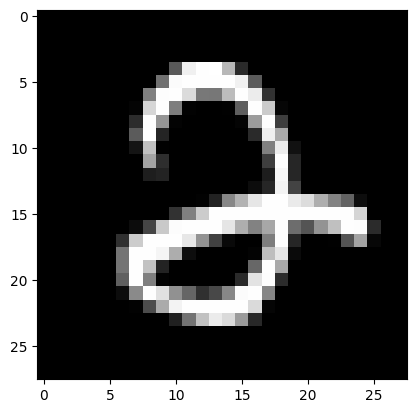

In [9]:
test_prediction(1042, w1, b1, w2, b2)
